In [4]:
import pandas as pd
import chromadb
import numpy as np
import umap
import matplotlib.pyplot as plt
import unicodedata
from datetime import datetime

import os, json 

In [42]:
from dotenv import load_dotenv

load_dotenv()


True

In [53]:
import openai
from bertopic.backend import OpenAIBackend
from bertopic.representation import OpenAI

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
openai_embedder = OpenAIBackend(client, os.getenv("DEFAULT_EMBEDDING_MODEL"))

In [45]:
from bertopic import BERTopic


In [5]:
from chromadb.config import Settings
import chromadb

In [8]:
import seaborn as sns

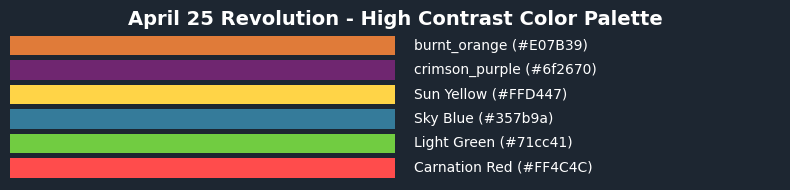

In [2]:
# Updated colors for better contrast with a dark (midnight blue) background
updated_colors = {
    "Carnation Red": "#FF4C4C",       # Brighter red
    "Light Green": "#71cc41",           # Pure white for max contrast
    "Sky Blue": "#357b9a",            # Brighter alternative to navy
    "Sun Yellow": "#FFD447",           # Brighter golden yellow
    "crimson_purple": "#6f2670",
    "burnt_orange": "#E07B39",

}
    # "test": "#6D676E",
    # "Olive Green": "#A2C523",         # Lighter, more vibrant green

april_25_palette = {
    "carnation_red": "#D72638",
    "deep_gold": "#F4A300",
    "olive_green": "#556B2F",
    "burnt_orange": "#E07B39",
    "crimson_purple": "#861388",
    "sky_blue": "#2E9CCA",
    "steel_gray": "#4B5D67",
    "burgundy_brown": "#6F1D1B"
}

palette = updated_colors

# Recreate the figure with updated colors
fig, ax = plt.subplots(figsize=(8, 2), facecolor="#1d2631")
ax.set_facecolor("#2E4057")

for i, (name, hex) in enumerate(palette.items()):
    ax.barh(i, 1, color=hex)
    ax.text(1.05, i, f"{name} ({hex})", va='center', fontsize=10, color='white')

ax.set_xlim(0, 2)
ax.set_ylim(-0.5, len(palette) - 0.5)
ax.axis('off')
plt.title("April 25 Revolution - High Contrast Color Palette", fontsize=14, weight='bold', color='white')
plt.tight_layout()
plt.show()


In [3]:
data_path = "./../data/embeddings/umap_metadata.csv"
docs_path = "./../data/embeddings/documents.csv"


In [ ]:
embeddings_path = "./../data/embeddings/"
meta_path = (os.path.join(embeddings_path,"metadata.json"))
with open(meta_path, 'r') as file:
    meta_concat = json.load(file)



In [6]:
db_path = "./../data/chroma_cravo"

client = chromadb.PersistentClient(path=db_path, 
                                   settings=Settings(anonymized_telemetry=False)
                                   )

In [7]:
collection = client.get_collection("cravo")

# Retrieve all documents and their embeddings
results = collection.get(
    include=["embeddings", "documents", "metadatas"]
)

# Access all embeddings
embeddings = results['embeddings']

# Print information about the embeddings
print(f"Retrieved {len(embeddings)} embeddings")
print(f"Dimension of embeddings: {embeddings.shape}")

# If you need to access the documents and metadata as well
documents = results['documents']
metadatas = results['metadatas']

Retrieved 900 embeddings
Dimension of embeddings: (900, 1536)


In [ ]:
reducer = umap.UMAP(
    n_components=2,  # Reduce to 2D (use 3 for 3D)
    n_neighbors=15,  # Controls how local/global the projection is (5-50)
    min_dist=0.1,    # Controls how tightly points are packed (0.0-1.0)
    random_state=42  # For reproducibility
)

# Fit and transform the embeddings
reduced_embeddings = reducer.fit_transform(embeddings)
umap_df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])


In [39]:
def test_umap(umap_args, show_fig=True):
    if len(umap_args) == 3:
        n_comp = umap_args[2]
    else:
        n_comp = 2

    reducer = umap.UMAP(
        n_components=n_comp,             # Reduce to 2D (use 3 for 3D)
        n_neighbors=umap_args[0],   # Controls how local/global the projection is (5-50)
        min_dist=umap_args[1],      # Controls how tightly points are packed (0.0-1.0)
        n_jobs=2,
        # random_state=69543972   # For reproducibility
    )

    # Fit and transform the embeddings
    reduced_embeddings = reducer.fit_transform(embeddings)
    if n_comp == 2:
        columns=["x", "y"]
    else:
        columns=range(n_comp)
    umap_df = pd.DataFrame(reduced_embeddings, columns=columns)

    if show_fig:

        fig, ax = plt.subplots(1, figsize=(5,5))
        
        sns.scatterplot(umap_df, x='x', y='y', ax=ax)
        ax.set_title(f"n_neigh={umap_args[0]}, min_dist={umap_args[1]}")
        ax.set_aspect(1)
        
        plt.show()
    return umap_df

/home/user/NOVA/_PhD/arquivo25/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


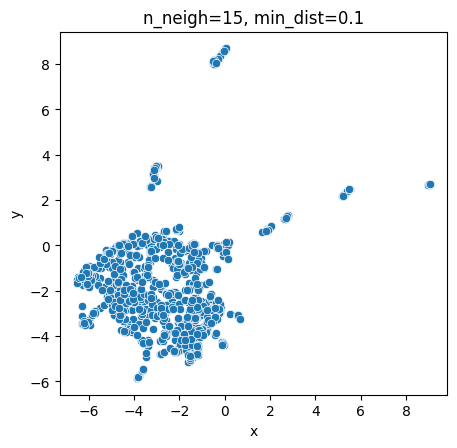

,x,y
0,-3.155538,3.177840
1,-3.178478,3.208917
2,-3.002885,3.491068
3,-3.072149,3.421690
4,-3.050653,3.426368
...,...,...
895,5.424281,2.415765
896,5.405130,2.404679
897,5.467345,2.470716
898,5.478010,2.472111


In [40]:
umap_args = [15, .1]
test_umap(umap_args)

/home/user/NOVA/_PhD/arquivo25/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


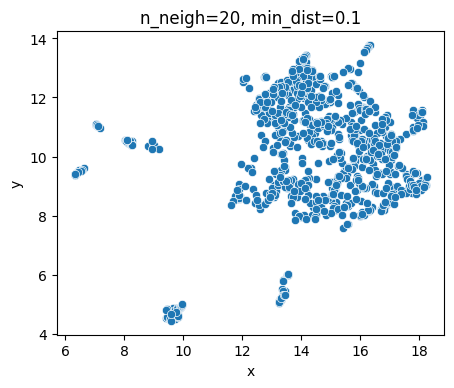

In [32]:
umap_args = [20, .1]
test_umap(umap_args)

/home/user/NOVA/_PhD/arquivo25/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


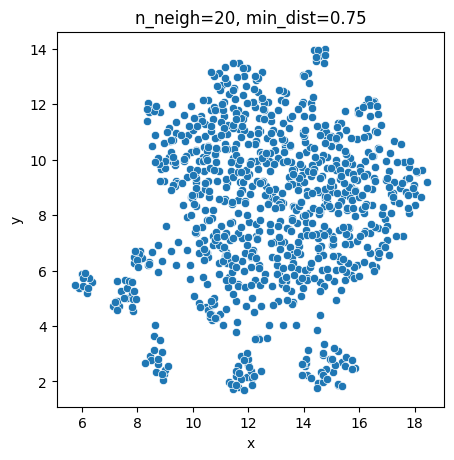

In [33]:
umap_args = [20, .75]
test_umap(umap_args)

/home/user/NOVA/_PhD/arquivo25/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


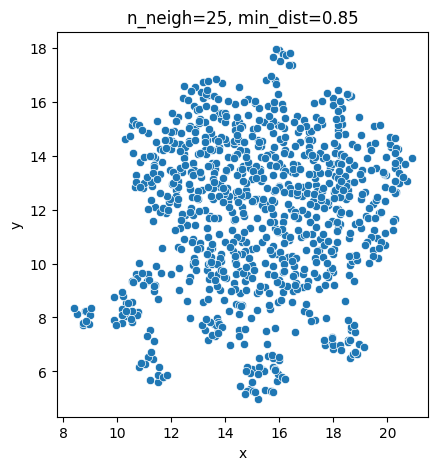

In [34]:
umap_args = [25, .85]
test_umap(umap_args)

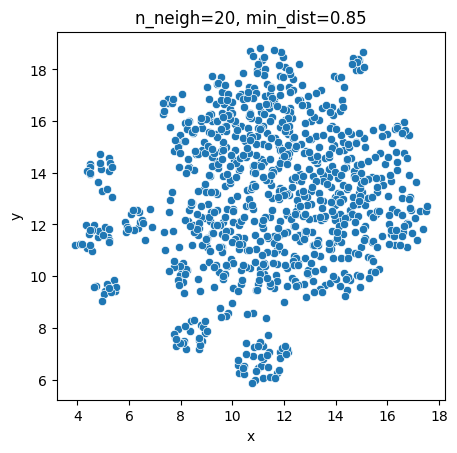

In [61]:
umap_args = [20, .85]
umap_2d = test_umap(umap_args)

In [41]:
umap_args = [15, .1, 30]
df_umap30 = test_umap(umap_args, False)

/home/user/NOVA/_PhD/arquivo25/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
representation_model = OpenAI(client, model="gpt-4o-mini", chat=True)


In [110]:

from hdbscan import HDBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture


In [133]:
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        metric='euclidean', 
                        cluster_selection_method='eom', 
                        prediction_data=True)

agglo = AgglomerativeClustering(n_clusters=10, 
                                linkage="ward", 
                                metric="euclidean")

# Create topic model
topic_model = BERTopic(
    representation_model=representation_model,
    hdbscan_model=agglo,
    )

In [134]:
topics, probs = topic_model.fit_transform(documents, embeddings)
umap_2d['topic_id'] = topics


In [135]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,278,0_Defesa da Democracia,[Defesa da Democracia],[A recente demissão do chefe do Exército é só ...
1,1,161,1_Commemorations in Portugal,[Commemorations in Portugal],[Os leitores são a força e a vida do PÚBLICO. ...
2,2,153,2_Processo Revolucionário Português,[Processo Revolucionário Português],[Páginas para editores conectados saiba mais\n...
3,3,117,3_Political Imprisonment History,[Political Imprisonment History],[Jornalista\nMotion designer\nQuando foi presa...
4,4,80,4_Privatization of TAP,[Privatization of TAP],[Os leitores são a força e a vida do PÚBLICO. ...
5,5,37,5_Revolução dos Cravos,[Revolução dos Cravos],"[A Revolução de 25 de Abril, também conhecida ..."
6,6,28,6_Descolonização portuguesa,[Descolonização portuguesa],[Os dois projectos apresentados para essa nova...
7,7,19,7_Estado Novo Portugal,[Estado Novo Portugal],[Estado Novo foi o regime político autoritário...
8,8,16,8_Junta de Salvação Nacional,[Junta de Salvação Nacional],[A Junta de Salvação Nacional (JSN) foi um gru...
9,9,11,9_Armed Forces Movement,[Armed Forces Movement],[O Movimento das Forças Armadas (MFA) foi o mo...


<Axes: xlabel='x', ylabel='y'>

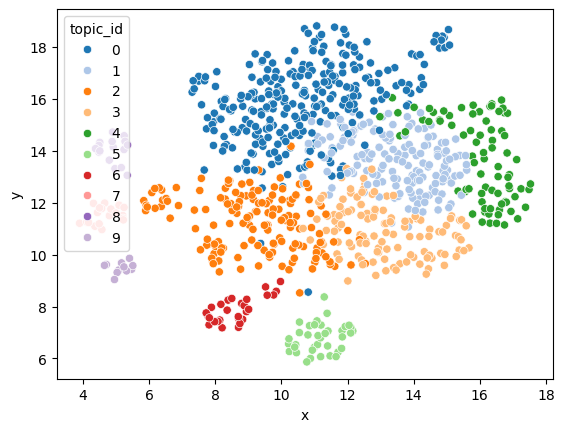

In [137]:

sns.scatterplot(umap_2d, x='x', y='y', hue='topic_id', palette='tab20')